In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks', context='talk')
import missingno as msno

%matplotlib inline

In [2]:
inhouse=pd.read_csv(r'H:\critical\inhouse.csv', encoding ='iso-8859-1')


In [3]:
columns=inhouse.columns.values
for i in range(len(columns)):
    try:
        inhouse[columns[i]]=inhouse[columns[i]].str.replace('>','')
        inhouse[columns[i]]=inhouse[columns[i]].str.replace('<','')
        inhouse[columns[i]]=inhouse[columns[i]].str.replace(',','').astype(float)
    except:
        pass

In [4]:
inhouse['EA_Ti_ppm']
inhouse.to_csv('H:\critical\inhouse_munged.csv')

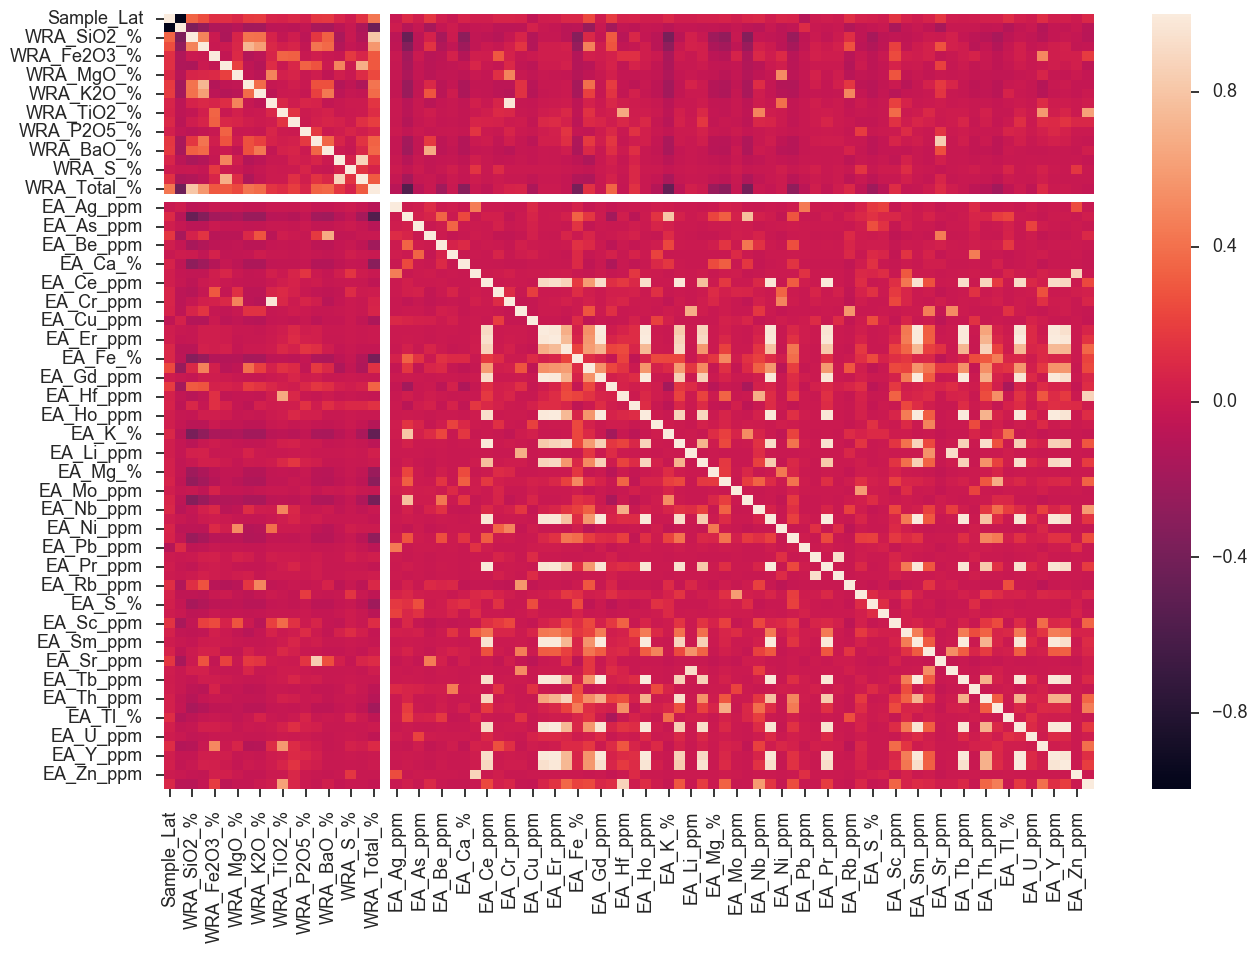

In [5]:
num=inhouse.iloc[0:,16:].fillna(0.)
plt.figure(figsize=(15,10))
sns.heatmap(num.corr())


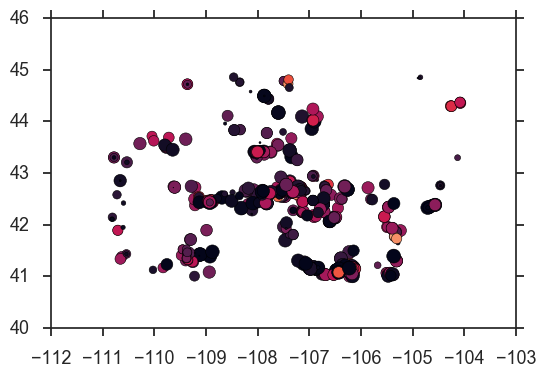

In [6]:
plt.scatter(inhouse.iloc[0:,17], inhouse.iloc[0:,16], c=inhouse.iloc[0:,19], s=inhouse.iloc[0:,18])

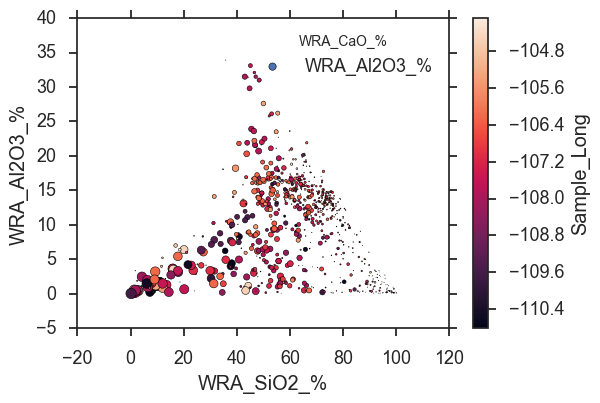

In [7]:
plt.scatter(inhouse.iloc[0:,18], inhouse.iloc[0:,19], c=inhouse.iloc[0:,17], s=inhouse.iloc[0:,21])
plt.xlabel(inhouse.columns.values[18])
plt.ylabel(inhouse.columns.values[19])
plt.colorbar(label=inhouse.columns.values[17])
plt.legend(scatterpoints=1, title=inhouse.columns.values[21])

In [8]:
inhouse.columns.values

array(['Publication', 'Unnamed: 1', 'Sample_ID', 'Old_Sample_ID', 'WyoDoG',
       'WyoDoG_Name', 'Sample_Desc', 'Sample_Date', 'Sampled_by',
       'Samp_Cab', 'Samp_Drwr', 'Samp_Photo_Link', 'Radiometric_Date',
       'XRD', 'O_Sample_Eval', 'Analysis_Date', 'Sample_Lat',
       'Sample_Long', 'WRA_SiO2_%', 'WRA_Al2O3_%', 'WRA_Fe2O3_%',
       'WRA_CaO_%', 'WRA_MgO_%', 'WRA_Na2O_%', 'WRA_K2O_%', 'WRA_Cr2O3_%',
       'WRA_TiO2_%', 'WRA_MnO_%', 'WRA_P2O5_%', 'WRA_SrO_%', 'WRA_BaO_%',
       'WRA_C_%', 'WRA_S_%', 'WRA_LOI_%', 'WRA_Total_%', 'Unnamed: 35',
       'EA_Ag_ppm', 'EA_Al_%', 'EA_As_ppm', 'EA_Au_ppm', 'EA_Ba_ppm',
       'EA_Be_ppm', 'EA_Bi_ppm', 'EA_Ca_%', 'EA_Cd_ppm', 'EA_Ce_ppm',
       'EA_Co_ppm', 'EA_Cr_ppm', 'EA_Cs_ppm', 'EA_Cu_ppm', 'EA_Dy_ppm',
       'EA_Er_ppm', 'EA_Eu_ppm', 'EA_Fe_%', 'EA_Ga_ppm', 'EA_Gd_ppm',
       'EA_Ge_ppm', 'EA_Hf_ppm', 'EA_Hg_ppm', 'EA_Ho_ppm', 'EA_In_ppm',
       'EA_K_%', 'EA_La_ppm', 'EA_Li_ppm', 'EA_Lu_ppm', 'EA_Mg_%',
       'EA_Mn_ppm

In [175]:
inhouse=pd.read_csv('H:\critical\inhouse_munged1.csv')
from sklearn import linear_model
X=inhouse[inhouse['EA_Ag_ppm'].notnull()].iloc[10:,38:].fillna(0).values
#X=nure[nure['ag_ppm'].notnull()].iloc[3000:,85:138].fillna(0).values
y=inhouse[inhouse['EA_Ag_ppm'].notnull()].iloc[10:,37].values
#y=nure[nure['ag_ppm'].notnull()].iloc[3000:,84]
Xtest=inhouse[inhouse['EA_Ag_ppm'].notnull()].iloc[0:10,38:].fillna(0).values
ytest=inhouse[inhouse['EA_Ag_ppm'].notnull()].iloc[0:10,37]

1738.862195348494

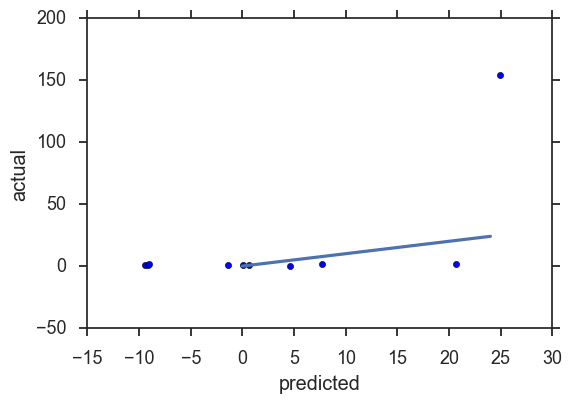

In [223]:
regr = linear_model.Lasso(alpha=100)
regr.fit(X,y)
plt.scatter(regr.predict(Xtest), ytest)
plt.plot(range(25))
plt.xlabel('predicted')
plt.ylabel('actual')
#imputed=np.full((10,1),np.median(ytest))
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, regr.predict(Xtest))


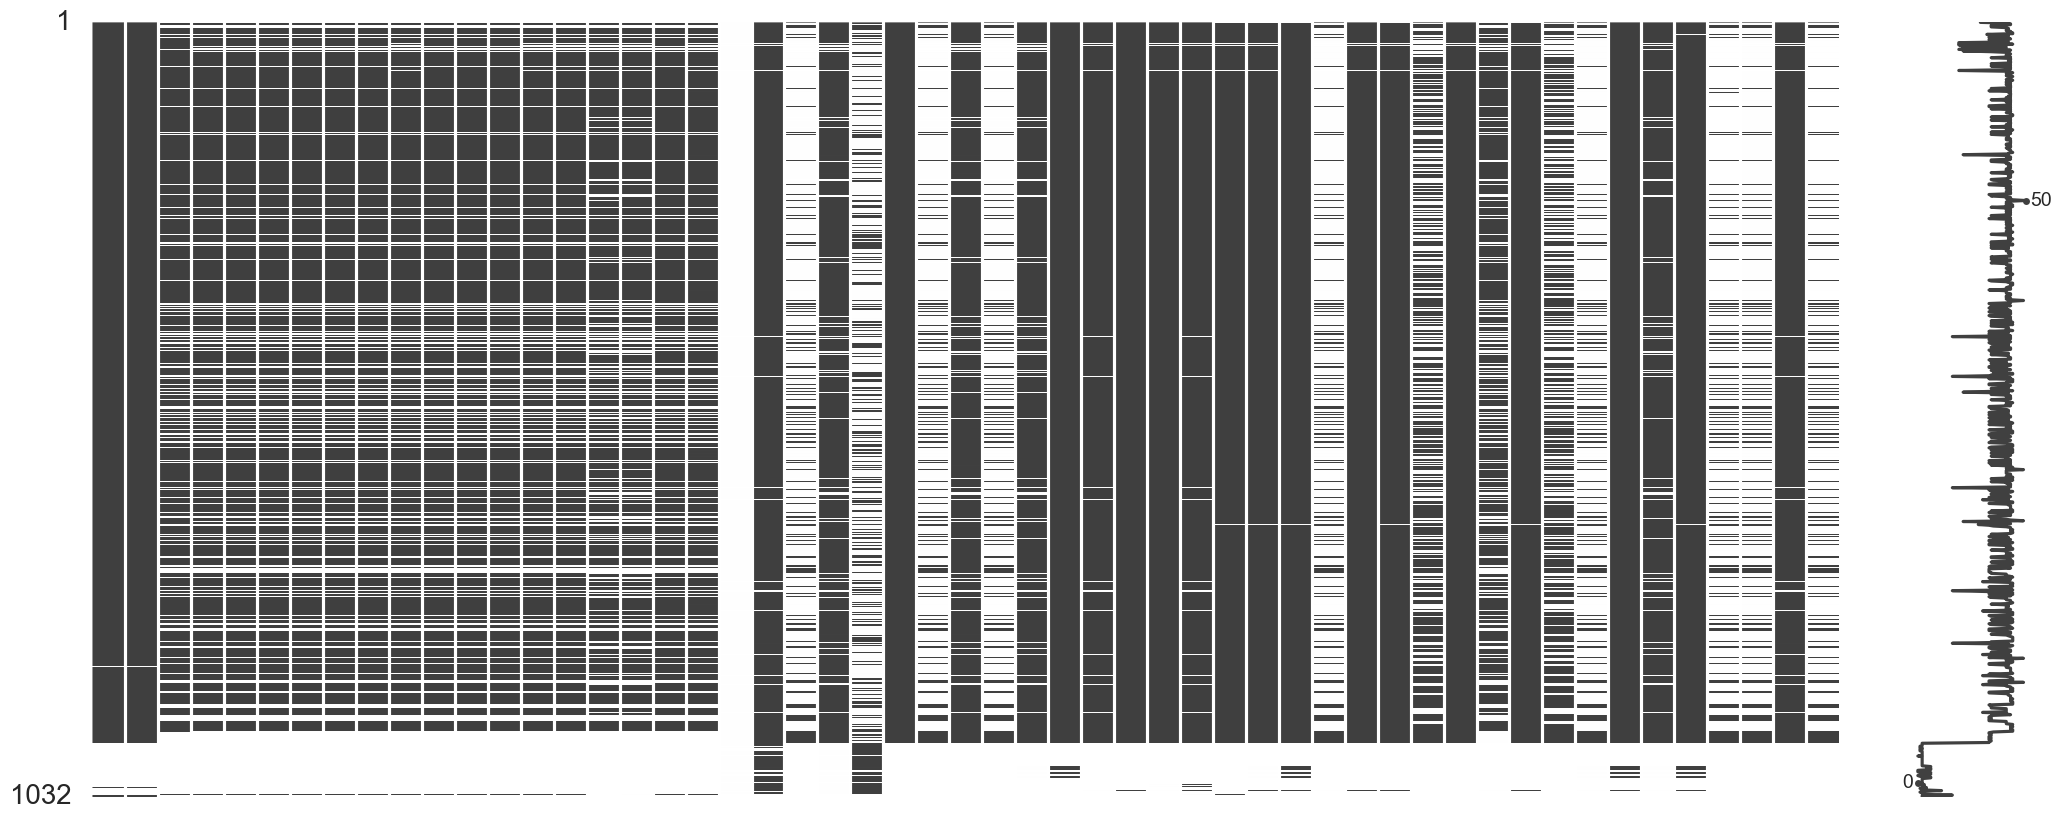

In [11]:
msno.matrix(inhouse.iloc[0:,17:70])

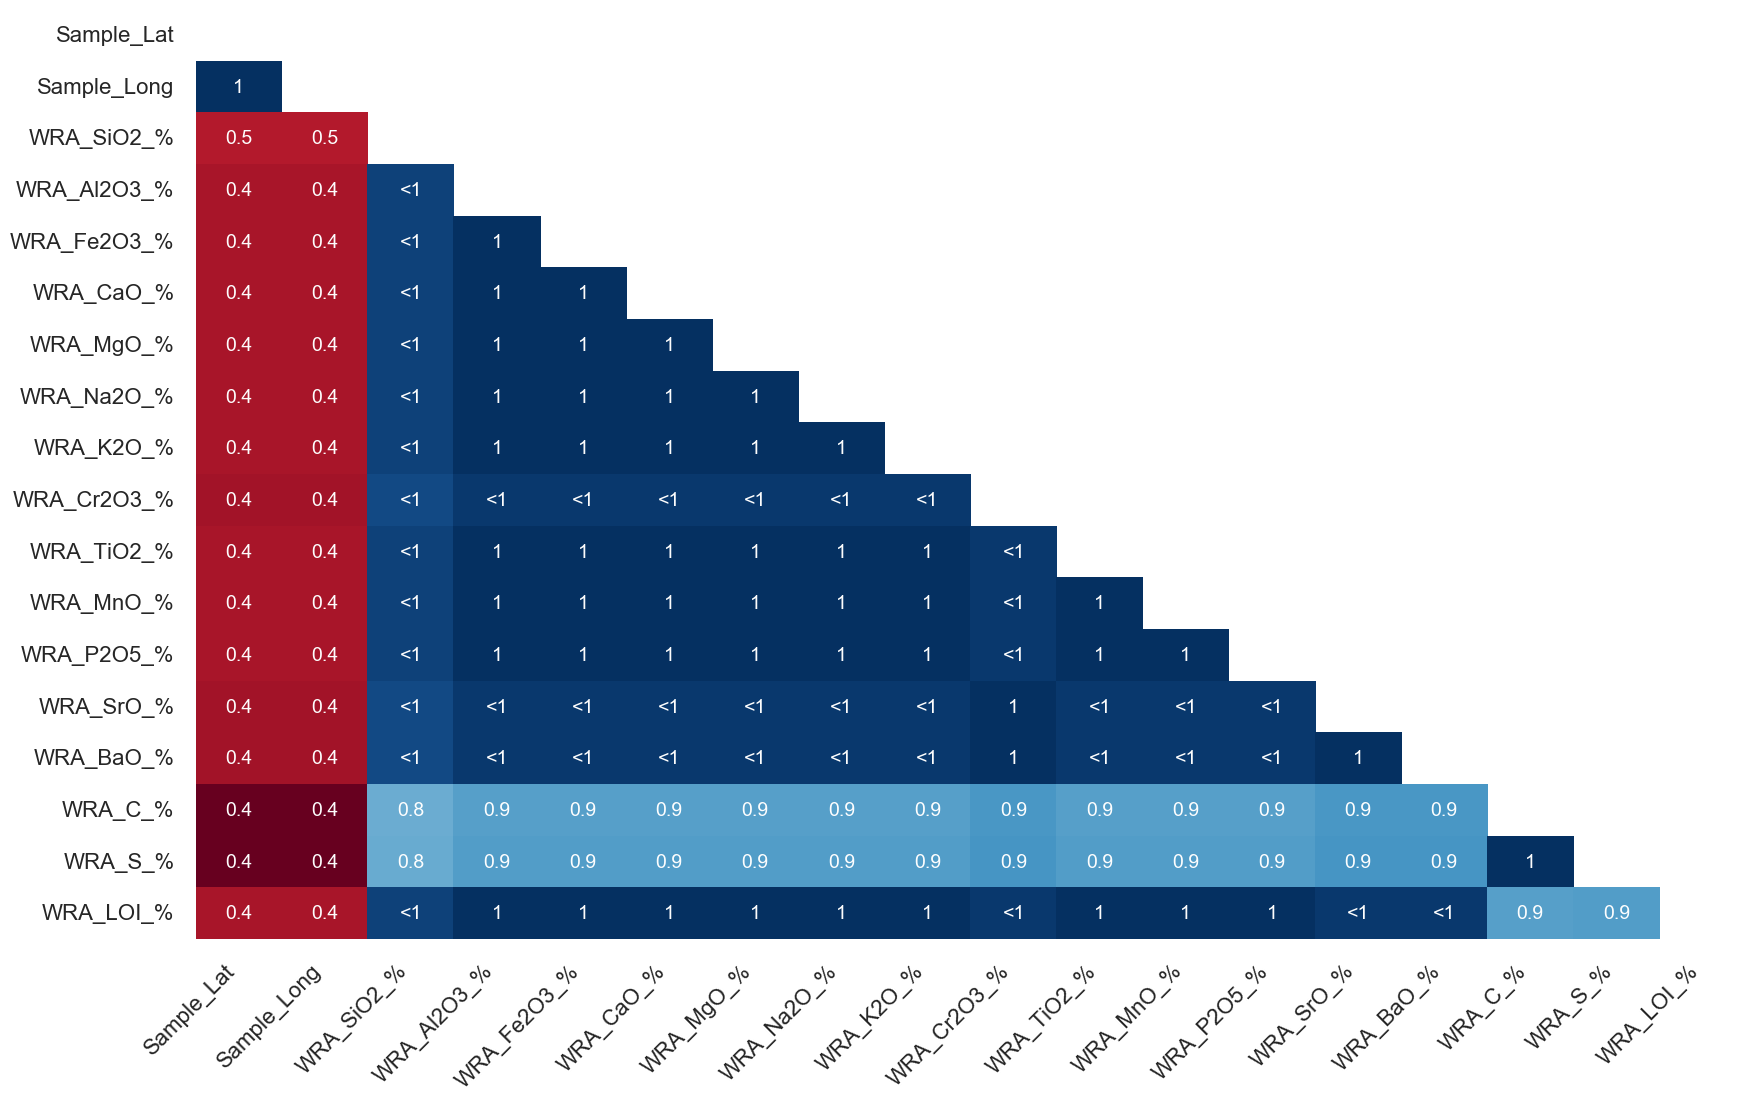

In [12]:
msno.heatmap(inhouse.iloc[0:,17:35])

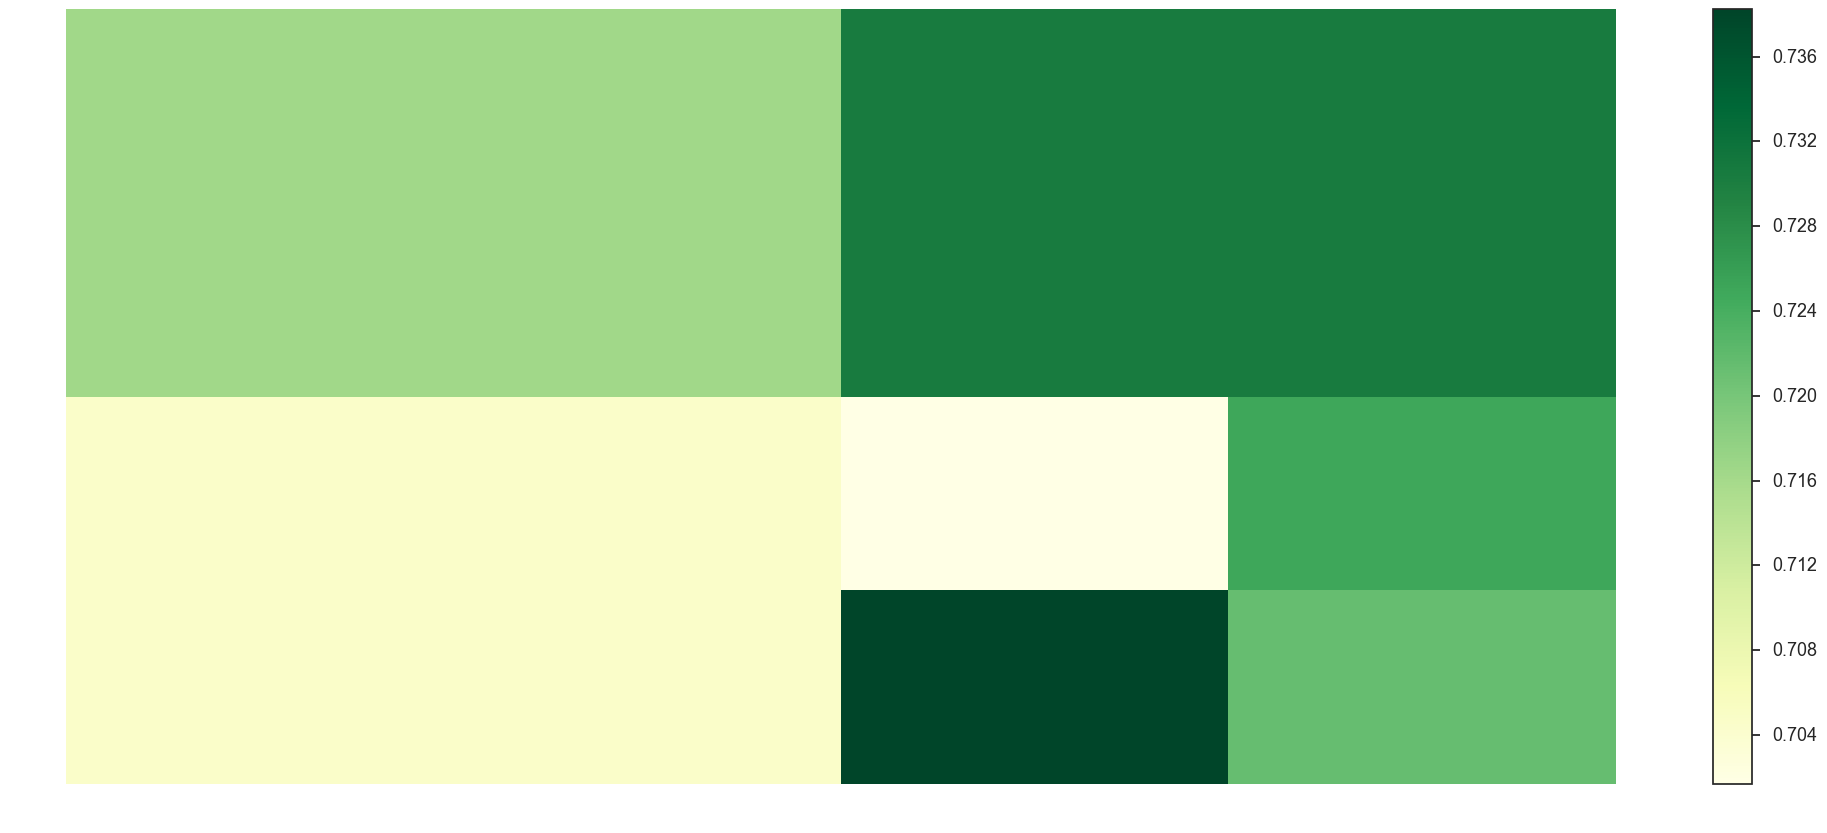

In [21]:
msno.geoplot(inhouse, x='Sample_Long', y='Sample_Lat')
#inhouse.columns.values

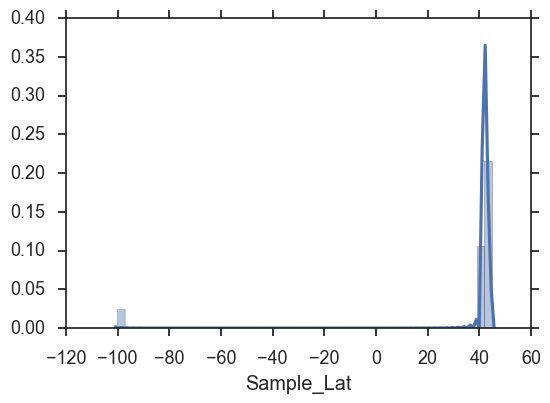

In [305]:
sns.distplot(inhouse.iloc[0:,16].fillna(-100))


In [308]:
for i in range(16,85):
    try:
        plt.hist(inhouse.iloc[0:,i].fillna(-100))
        plt.xlim(-100,100)
        plt.savefig('M:/critical/histograms/'+str(inhouse.columns.values[i]))
        plt.clf()
    except:
        pass

In [2]:
nure=pd.read_csv(r'M:\critical\nure.csv', encoding ='iso-8859-1')

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (19,20,28,29,31,35,46,47,48,66,68,79,145) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


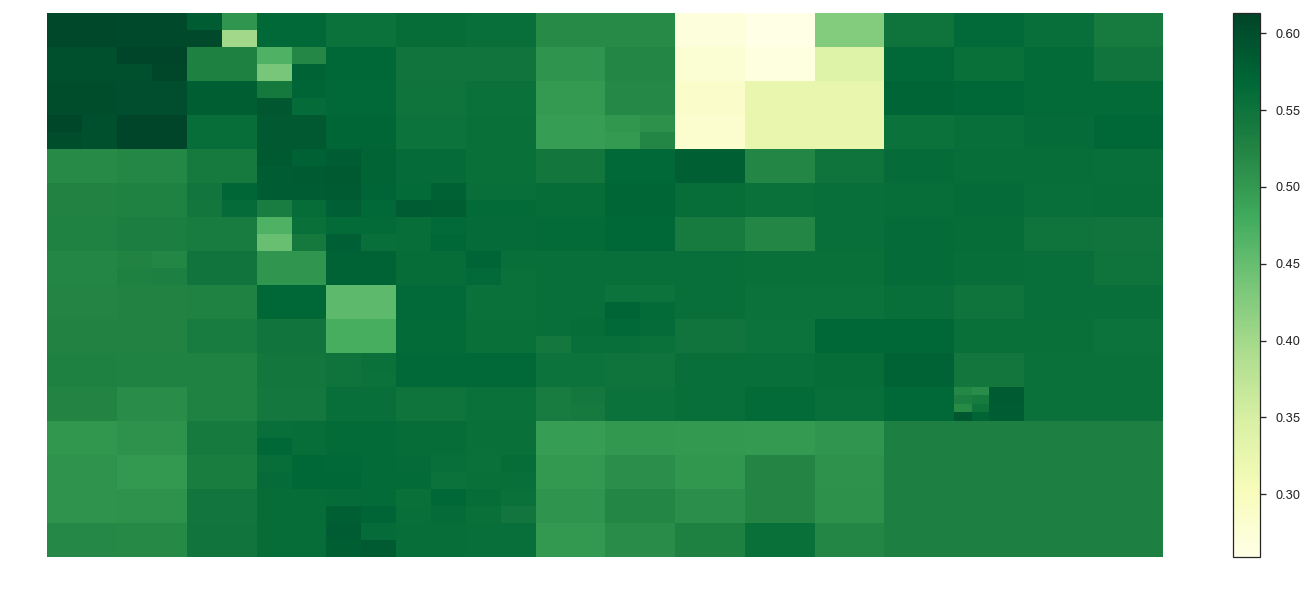

In [3]:
msno.geoplot(nure, x='longitude', y='latitude')

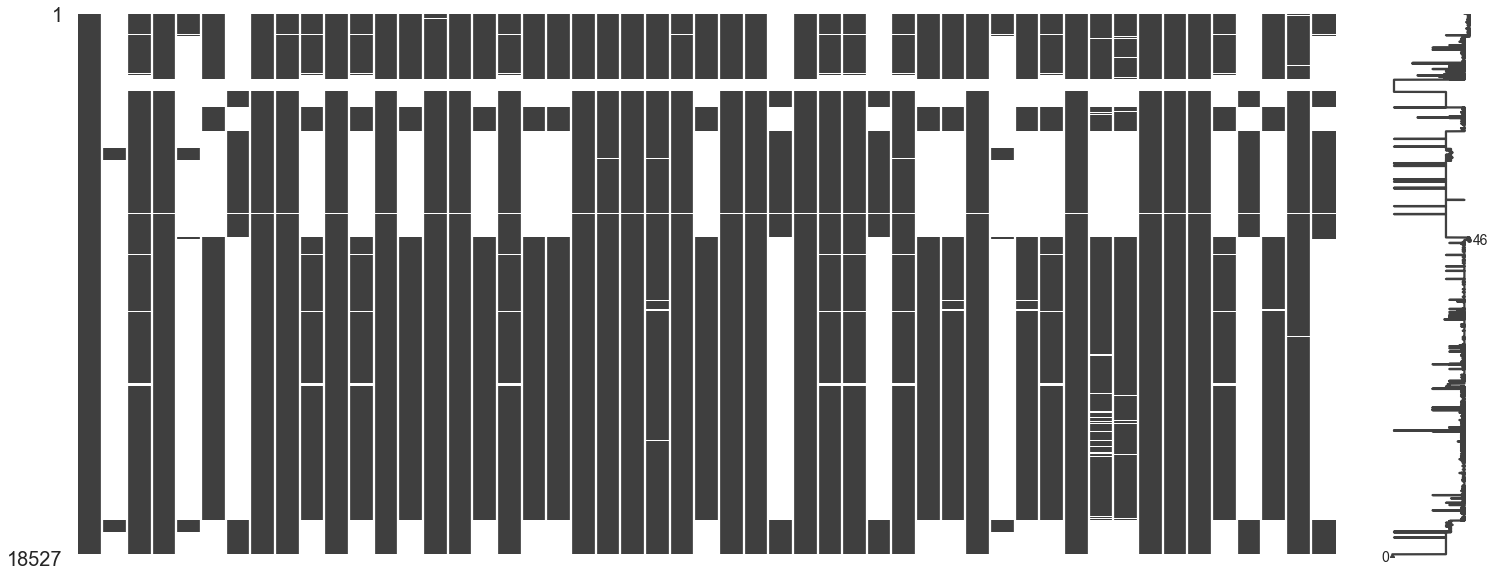

In [3]:
dataColumns=['u_dn_ppm', 'u_fl_ppm', 
       'ag_ppm', 'al_pct', 'as_ppm', 'au_ppm', 'b_ppm', 'ba_ppm', 'be_ppm',
       'bi_ppm', 'ca_pct', 'cd_ppm', 'ce_ppm', 'cl_ppm',
       'co_ppm', 'cr_ppm', 'cs_ppm', 'cu_ppm', 'dy_ppm', 'eu_ppm',
       'fe_pct', 'hf_ppm', 'k_pct', 'la_ppm', 'li_ppm', 'lu_ppm',
       'mg_pct', 'mn_ppm', 'mo_ppm', 'na_pct', 'nb_ppm', 'ni_ppm', 'p_ppm',
       'pb_ppm', 'rb_ppm', 'sb_ppm', 'sc_ppm', 'se_ppm',
       'sm_ppm', 'sn_ppm', 'sr_ppm', 'ta_ppm', 'tb_ppm', 'th_ppm',
       'ti_ppm', 'v_ppm', 'w_ppm', 'y_ppm', 'yb_ppm', 'zn_ppm', 'zr_ppm']
msno.matrix(nure[dataColumns[0:]])

In [4]:
for j in range(len(dataColumns)):
    news=[]
    for i in range(len(nure[dataColumns[j]])):
        if nure[dataColumns[j]][i]<0:
            news.append(np.random.randint(0,np.ceil(abs(nure[dataColumns[j]][i]))))
        else:
            news.append(nure[dataColumns[j]][i])
    nure[dataColumns[j]]=news

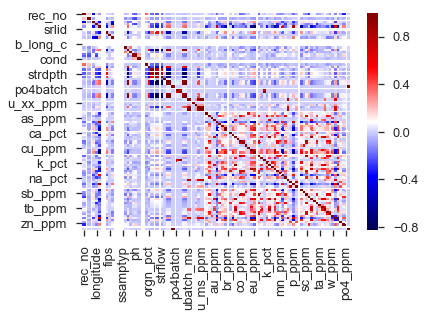

In [5]:
filled=nure.fillna(0)
sns.heatmap(filled.corr(), cmap='seismic')

In [56]:
from sklearn.cluster import Birch

In [57]:
result=list(zip(nure['longitude'].values, nure['latitude'].values, nure['u_xx_ppm'],nure['u_dn_ppm'],nure['u_fl_ppm'],
                nure['u_ms_ppm'], nure['u_na_ppm'],nure['ag_ppm'],nure['al_pct'],nure['as_ppm'],nure['au_ppm'],nure['b_ppm'],nure['ba_ppm'],
                nure['be_ppm'],nure['bi_ppm'],nure[ 'br_ppm'],nure['ca_pct'],nure['cd_ppm'],nure['ce_ppm'],nure['cl_ppm'],nure['co_ppm'],
                nure['cr_ppm'],nure['cs_ppm'],nure[ 'cu_ppm'],nure['dy_ppm'],nure['eu_ppm'],nure['f_ppm'],nure['fe_pct'],nure['hf_ppm'],
                nure['hg_ppm'],nure['k_pct'],nure['la_ppm'],nure['li_ppm'],nure['lu_ppm'],nure['mg_pct'],nure['mn_ppm'],nure['mo_ppm'],
                nure['na_pct'],nure['nb_ppm'],nure[ 'ni_ppm'],nure['p_ppm'],nure['pb_ppm'],nure['pt_ppm'],nure['rb_ppm'],nure['sb_ppm'],
                nure['sc_ppm'],nure['se_ppm'],nure['sm_ppm'],nure['sn_ppm'],nure['sr_ppm'],nure['ta_ppm'],nure['tb_ppm'],nure['th_ppm'],
                nure['ti_ppm'],nure['v_ppm'],nure['w_ppm'],nure['y_ppm'],nure['yb_ppm'],nure['zn_ppm'],nure['zr_ppm'],nure['po4_ppm'],
                nure['so4_ppm']))
brc=Birch(branching_factor=50, n_clusters=10, threshold=0.9, compute_labels=True)
brc.fit(result)
brc.predict(result)
nure['cluster']=brc.predict(result)


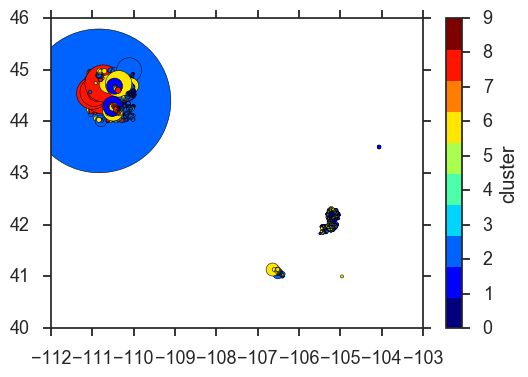

In [58]:
plt.scatter(nure['longitude'], nure['latitude'], c=brc.predict(result), cmap=plt.cm.get_cmap('jet', 10), s=nure['as_ppm'])
plt.colorbar(label='cluster', ticks=range(10))

In [59]:
medianClusters=pd.DataFrame()
for i in range(10):
    clusterNumber=i
    medianClusters[i]=nure[nure['cluster']==clusterNumber][['u_xx_ppm', 'u_dn_ppm', 'u_fl_ppm', 'u_ms_ppm', 'u_na_ppm',
       'ag_ppm', 'al_pct', 'as_ppm', 'au_ppm', 'b_ppm', 'ba_ppm', 'be_ppm',
       'bi_ppm', 'br_ppm', 'ca_pct', 'cd_ppm', 'ce_ppm', 'cl_ppm',
       'co_ppm', 'cr_ppm', 'cs_ppm', 'cu_ppm', 'dy_ppm', 'eu_ppm', 'f_ppm',
       'fe_pct', 'hf_ppm', 'hg_ppm', 'k_pct', 'la_ppm', 'li_ppm', 'lu_ppm',
       'mg_pct', 'mn_ppm', 'mo_ppm', 'na_pct', 'nb_ppm', 'ni_ppm', 'p_ppm',
       'pb_ppm', 'pt_ppm', 'rb_ppm', 'sb_ppm', 'sc_ppm', 'se_ppm',
       'sm_ppm', 'sn_ppm', 'sr_ppm', 'ta_ppm', 'tb_ppm', 'th_ppm',
       'ti_ppm', 'v_ppm', 'w_ppm', 'y_ppm', 'yb_ppm', 'zn_ppm', 'zr_ppm',
       'po4_ppm', 'so4_ppm']].median()
#medianClusters.sort_values(1)[0]

(0, 30)

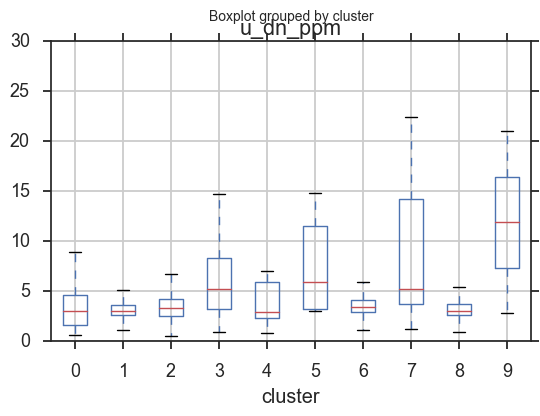

In [66]:
nure.boxplot(column='u_dn_ppm', by='cluster')
plt.ylim(0,30)

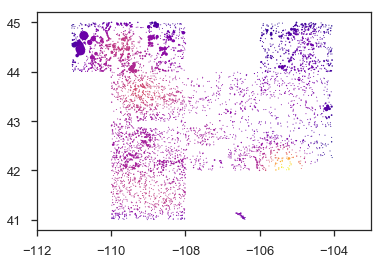

In [6]:
#plt.scatter(nure['longitude'], nure['latitude'], s=nure['co_ppm'])
from scipy.stats import gaussian_kde
'''
smooths the latitude and longitude with a gaussian kernel that makes a heat map
'''

xy = np.vstack([nure['longitude'], nure['latitude']])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(nure['longitude'], nure['latitude'], c=z, s=nure['sb_ppm'],cmap = plt.cm.plasma, edgecolor='')
plt.xlim(-112,-103)
plt.show()

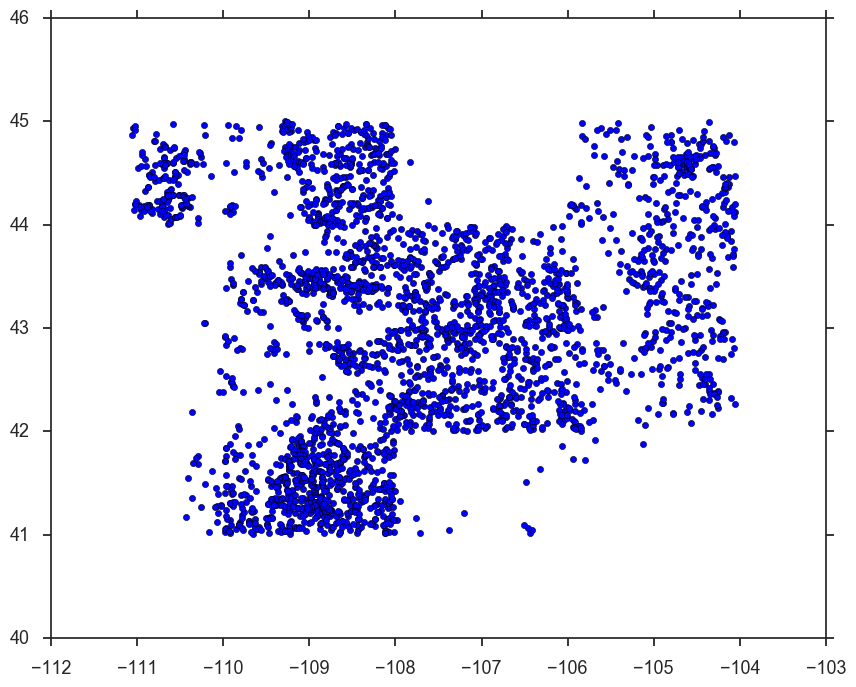

In [304]:
cNumber=8
plt.scatter(nure[nure['cluster']==cNumber]['longitude'],nure[nure['cluster']==cNumber]['latitude'])

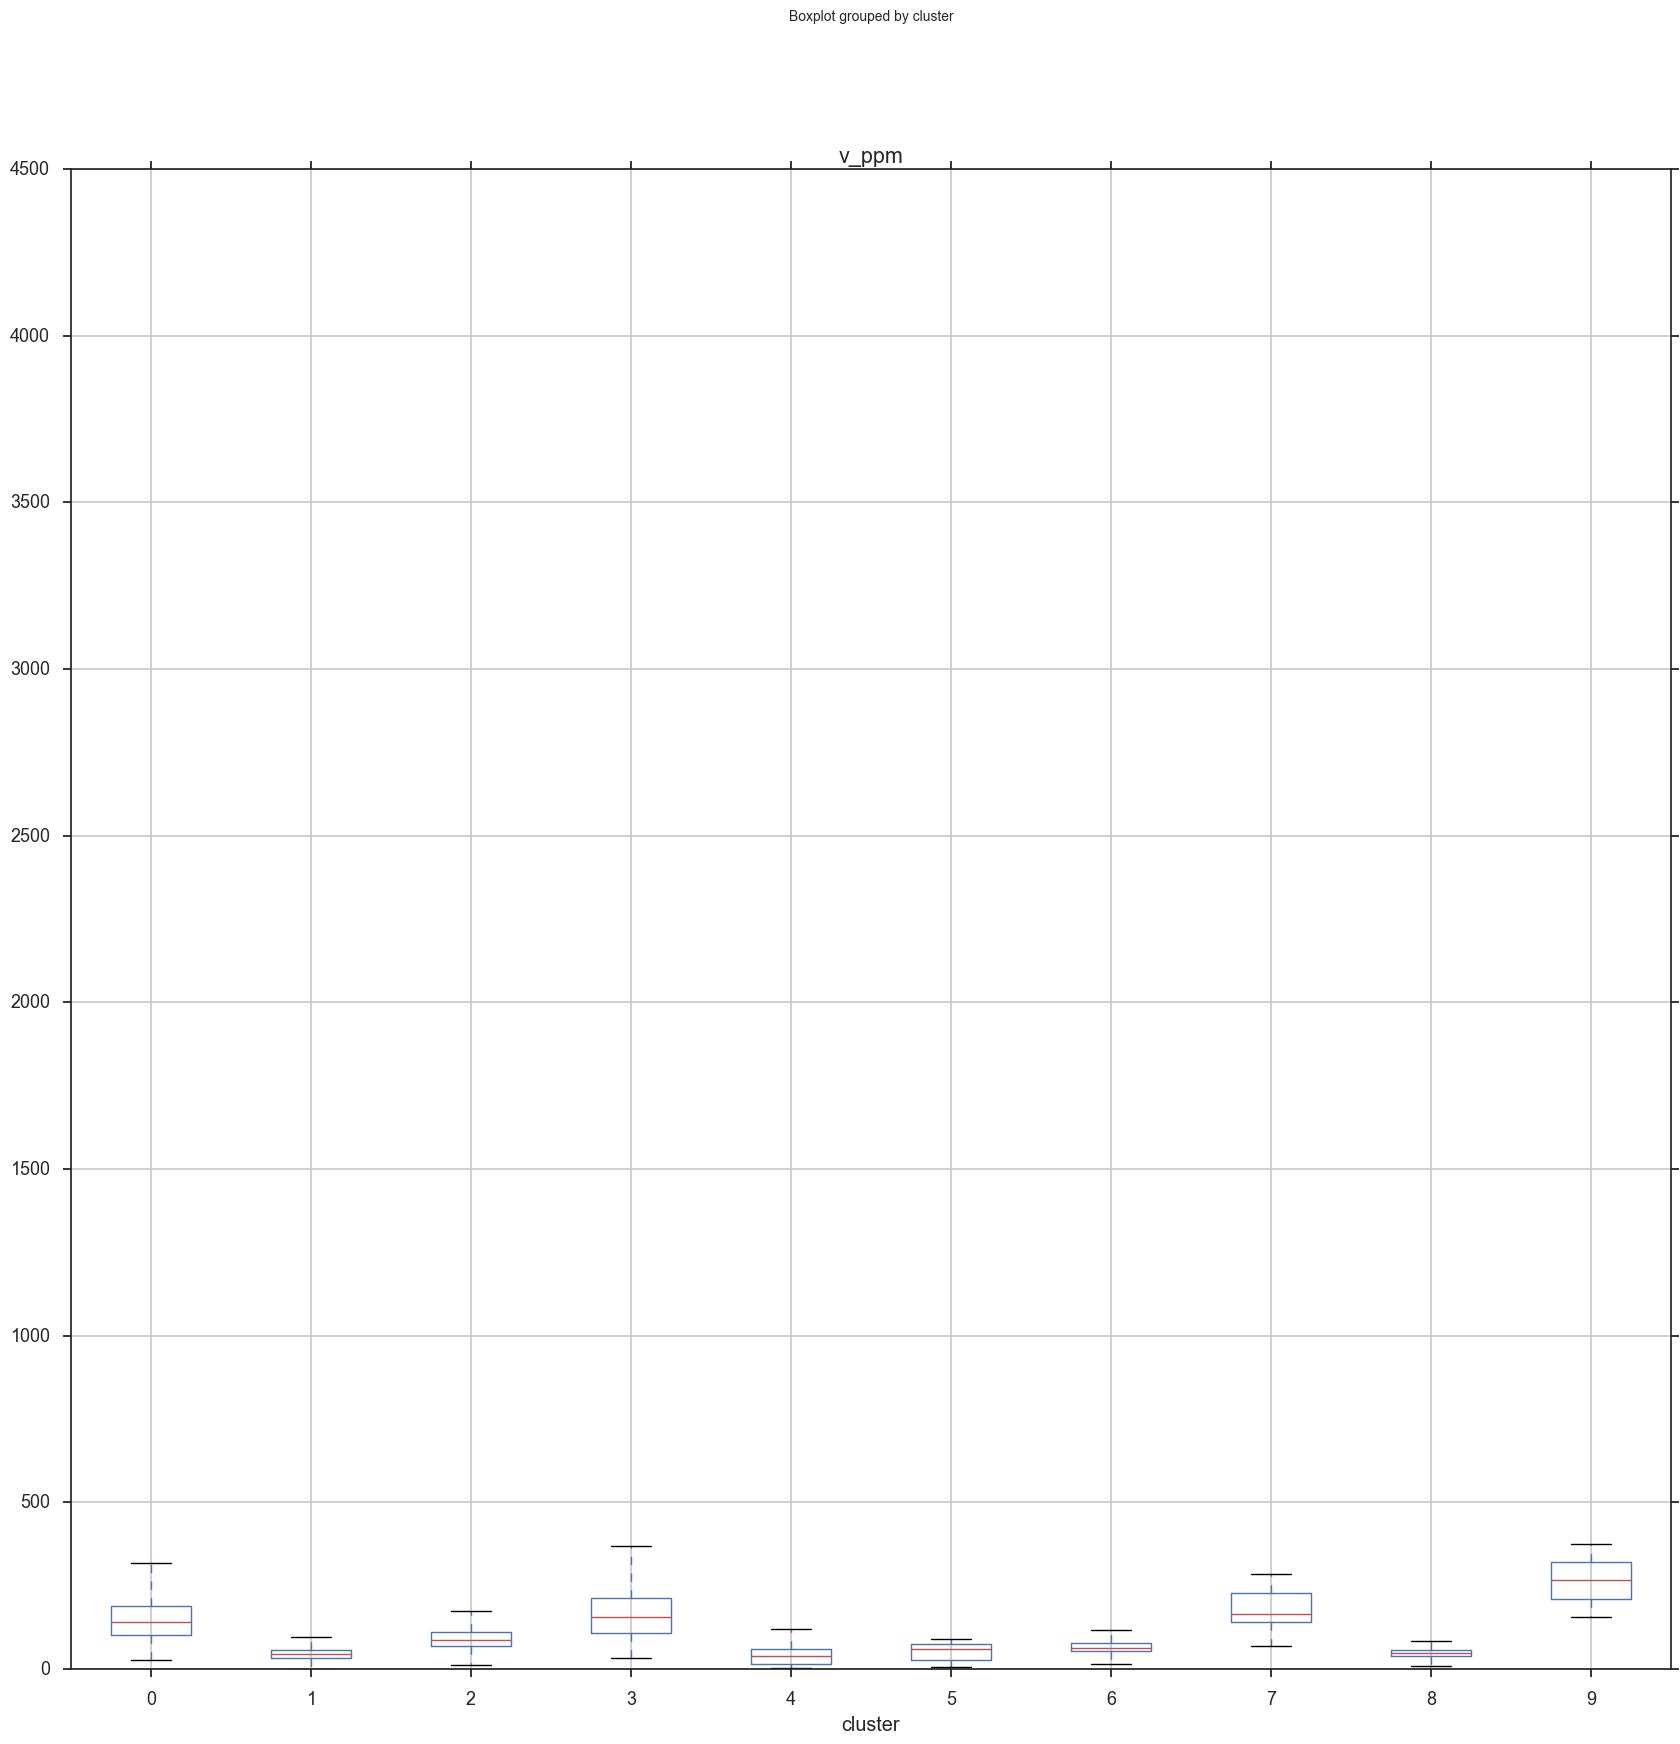

In [125]:
nure.boxplot(column='v_ppm', by='cluster', figsize=(20,20))

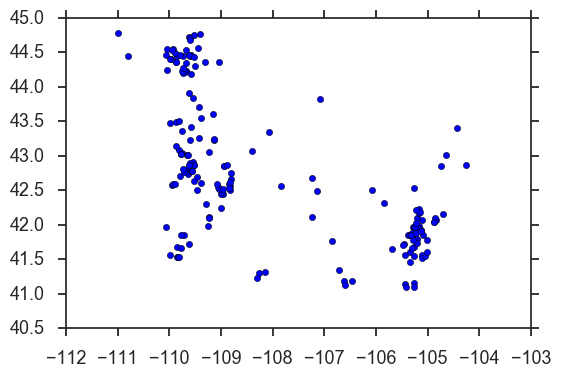

In [166]:
plt.scatter(nure[nure['cluster']==3]['longitude'],nure[nure['cluster']==3]['latitude'])

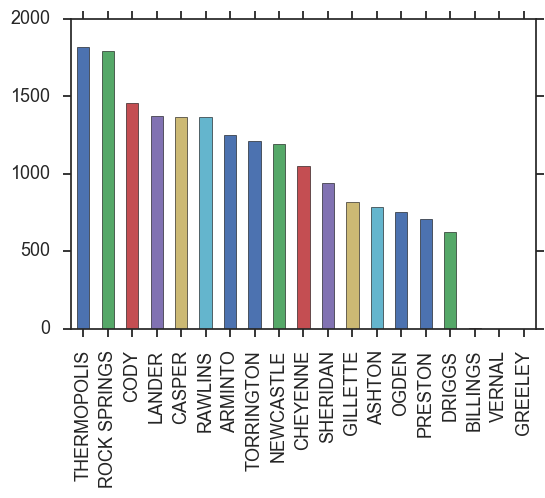

In [209]:
nure['quad'].value_counts().plot(kind='bar')

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


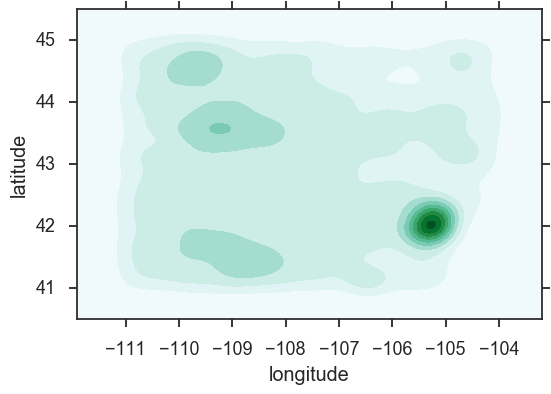

In [211]:
sns.kdeplot(nure['longitude'], nure['latitude'], shade=True)

In [232]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier

In [255]:
targets=[]
for i in range(len(nure['rocktyp'])):
    if nure['rocktyp'][i]=='SEDIMENTARY':
            targets.append(0)
    elif nure['rocktyp'][i]=='IGNEOUS':
            targets.append(1)
    elif nure['rocktyp'][i]=='METAMORPHIC':
            targets.append(2)
    elif nure['rocktyp'][i]=='UNKNOWN':
            targets.append(3)
    elif nure['rocktyp'][i]==0:
            targets.append(3)
nure['targets']=targets

In [299]:
#X,y = make_blobs(n_samples=1000, n_features=10, centers=1000, random_state=0)
clf=RandomForestClassifier(n_estimators=40, max_depth=None, min_samples_split=2)

In [300]:
scores=cross_val_score(clf, X, y)

In [13]:
#nure[dataColumns[5:10]]

In [7]:
import statsmodels as sm
from statsmodels.imputation import mice
nure.iloc[0:,105:115].columns.values

array(['hf_ppm', 'hg_ppm', 'k_pct', 'la_ppm', 'li_ppm', 'lu_ppm',
       'mg_pct', 'mn_ppm', 'mo_ppm', 'na_pct'], dtype=object)

In [8]:
imp=sm.imputation.mice.MICEData(nure[dataColumns])


In [10]:
imp=sm.imputation.mice.MICEData(nure[dataColumns],perturbation_method='gaussian', k_pmm=2)
imp.update_all(1)
#nure.iloc[0:,95:120]

ValueError: shape mismatch: value array of shape (439,1) could not be broadcast to indexing result of shape (439,)

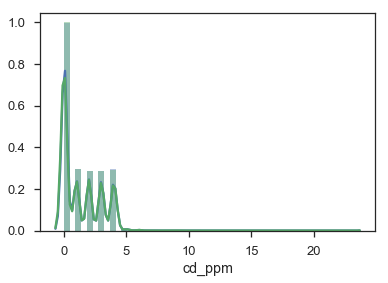

In [26]:
sns.distplot(imp.data[dataColumns[11]])
sns.distplot(nure[dataColumns[11]].fillna(0))


C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


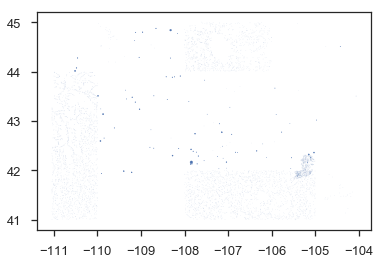

In [12]:
plt.scatter(nure['longitude'],nure['latitude'], s=imp.data[dataColumns[5]])
#plt.scatter(nure['longitude'],nure['latitude'], s=nure[dataColumns[4]])

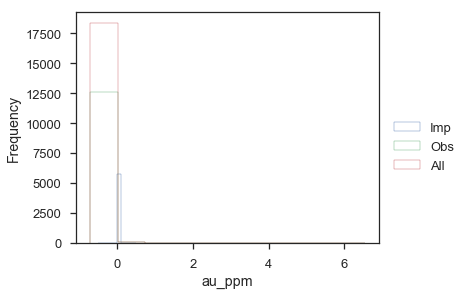

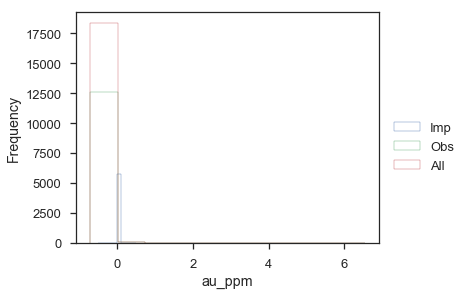

In [13]:
imp.plot_imputed_hist(dataColumns[5])